In [7]:
from PIL import Image
import requests
from modeling_blip_2 import Blip2ForConditionalGeneration
from processing_blip_2 import Blip2Processor
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = Blip2Processor.from_pretrained("/home/caizf/models/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained(
    "/home/caizf/models/blip2-flan-t5-xl", torch_dtype=torch.float16
)
model.to(device)  # doctest: +IGNORE_RESULT


For stability purposes, it is recommended to have accelerate installed when using this model in torch.float16, please install it with `pip install accelerate`


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0): Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
        (1): Blip2EncoderLayer(
          (self_attn): 

In [10]:
url = "https://tse3-mm.cn.bing.net/th/id/OIP-C.eSS4x40qTlliW4ftI7-RNAHaNK?pid=ImgDet&rs=1"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

print(generated_text)

/home/caizf/miniconda3/envs/lavis/lib/python3.8/site-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


asian girl with long hair and a white dress


In [2]:
from PIL import Image
import requests
url = "https://tse3-mm.cn.bing.net/th/id/OIP-C.eSS4x40qTlliW4ftI7-RNAHaNK?pid=ImgDet&rs=1"
image = Image.open(requests.get(url, stream=True).raw)

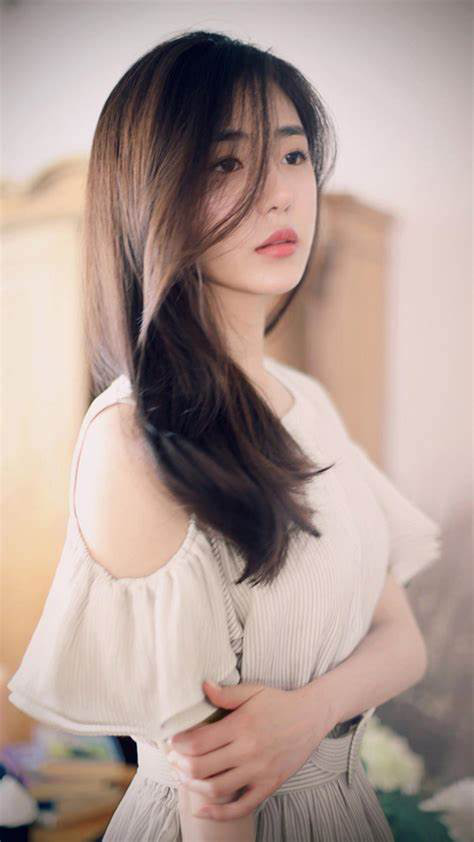

In [3]:
image